# Coding Block 2 - Logistic Regression

### Load the packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
'''
...
'''

'\n...\n'

### Read the dataset (You can test both preprocessed and raw data). 

In [2]:
diab=pd.read_csv('C:\\Users\\v.weber\\Documents\\000 Master Wirtschaftsinformatik FU Berlin\\I\\Applied Analytics\\github stuff\\fork\\Applied-Analytics\\data\\diabetes.csv')

### Let's Do Some Predictive Modeling

### Stratification:
Split the dataset into train (75%) and test datasets (25%)

In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'diab' is your dataframe
train_df, test_df = train_test_split(diab, test_size=0.25, random_state=42)

# train_df contains 75% of the data
# test_df contains 25% of the data

### Do a Logistic Regression with test and training data

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def perform_logistic_regression(dataframe, target_column, test_size=0.25, random_state=42):
    """
    Perform logistic regression on a given dataframe.

    Parameters:
        dataframe (pd.DataFrame): The input dataframe.
        target_column (str): The name of the target column.
        test_size (float): The proportion of the data to include in the test split.
        random_state (int): Random state for reproducibility.

    Returns:
        dict: A dictionary containing the model, accuracy, and predictions.
    """
    # Split the dataframe into features (X) and target (y)
    X = dataframe.drop(columns=[target_column])
    y = dataframe[target_column]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Initialize and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return {
        "model": model,
        "accuracy": accuracy,
        "predictions": y_pred
    }

# Example usage:
# result = perform_logistic_regression(diab, target_column="target")
# print("Accuracy:", result["accuracy"])

In [6]:
test_logistic_regressed = perform_logistic_regression(test_df, target_column="Outcome")

c:\Users\v.weber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
train_logistic_regressed = perform_logistic_regression(train_df, target_column="Outcome")

c:\Users\v.weber\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculate Odds Ratios 
Find out about the feature importance by calculating the odds ratios of the logistic regression model 

In [9]:
def get_column_names_except(dataframe, exclude_columns):
    """
    Get all column names of a dataframe except for the specified ones.

    Parameters:
        dataframe (pd.DataFrame): The input dataframe.
        exclude_columns (list): A list of column names to exclude.

    Returns:
        list: A list of column names excluding the specified ones.
    """
    return [col for col in dataframe.columns if col not in exclude_columns]

# Example usage:
# excluded_columns = ["target", "id"]
# remaining_columns = get_column_names_except(diab, excluded_columns)
# print(remaining_columns)

In [10]:
feature_cols = get_column_names_except(diab, exclude_columns=["Outcome"])

In [8]:
import numpy as np
import pandas as pd

def calculate_odds_ratios(model, feature_names):
    """
    Calculate the odds ratios for a given logistic regression model.

    Parameters:
        model (LogisticRegression): The trained logistic regression model.
        feature_names (list): List of feature names corresponding to the model coefficients.

    Returns:
        pd.DataFrame: A dataframe containing features, coefficients, and odds ratios.
    """
    # Extract coefficients from the model
    coefficients = model.coef_[0]
    
    # Calculate odds ratios by exponentiating the coefficients
    odds_ratios = np.exp(coefficients)
    
    # Create a dataframe for better readability
    odds_ratios_df = pd.DataFrame({
        "Feature": feature_names,
        "Coefficient": coefficients,
        "Odds Ratio": odds_ratios
    })
    
    return odds_ratios_df

# Example usage:
# Assuming `result` is the output of perform_logistic_regression
# feature_names = diab.drop(columns=["target"]).columns.tolist()
# odds_ratios_df = calculate_odds_ratios(result["model"], feature_names)
# print(odds_ratios_df)

In [11]:
test_odd_ratios = calculate_odds_ratios(test_logistic_regressed["model"], feature_cols)
train_odd_ratios = calculate_odds_ratios(train_logistic_regressed["model"], feature_cols)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

def visualize_logistic_regression_all_features(dataframe, target_column, model, feature_columns):
    """
    Visualize logistic regression results for all feature combinations using Seaborn scatterplots.

    Parameters:
        dataframe (pd.DataFrame): The input dataframe.
        target_column (str): The name of the target column.
        model (LogisticRegression): The trained logistic regression model.
        feature_columns (list): A list of feature column names to visualize.

    Returns:
        None
    """
    # Add predicted probabilities to the dataframe
    X = dataframe[feature_columns]
    dataframe['Predicted_Probabilities'] = model.predict_proba(X)[:, 1]
    
    # Iterate over all combinations of feature pairs
    for feature_x, feature_y in combinations(feature_columns, 2):
        plt.figure(figsize=(10, 6))
        scatter = sns.scatterplot(
            data=dataframe,
            x=feature_x,
            y=feature_y,
            hue=target_column,
            style=target_column,
            palette="coolwarm",
            size='Predicted_Probabilities',
            sizes=(20, 200),
            alpha=0.8
        )
        
        # Add a legend and labels
        plt.title(f"Logistic Regression Visualization: {feature_x} vs {feature_y}")
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)
        plt.legend(title="Target")
        plt.show()

# Example usage:
# Assuming `result` is the output of perform_logistic_regression
# feature_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
# visualize_logistic_regression_all_features(diab, target_column="Outcome", model=result["model"], feature_columns=feature_columns)

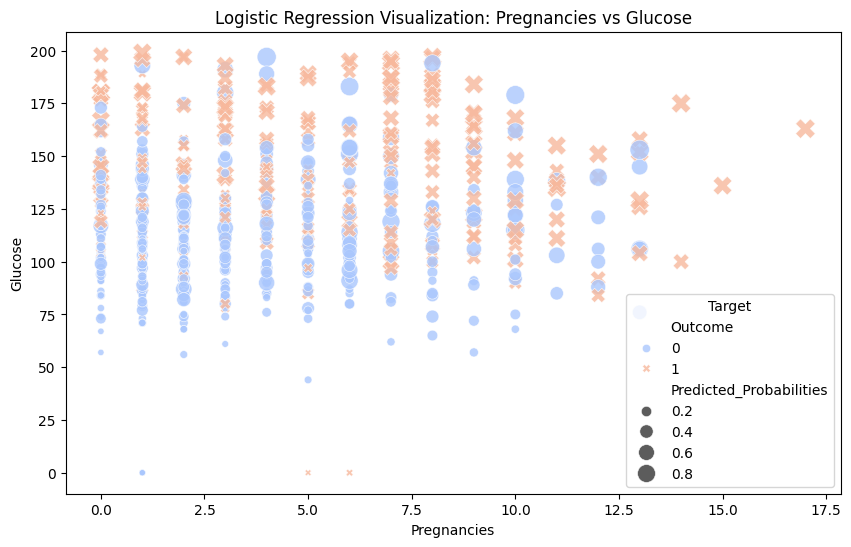

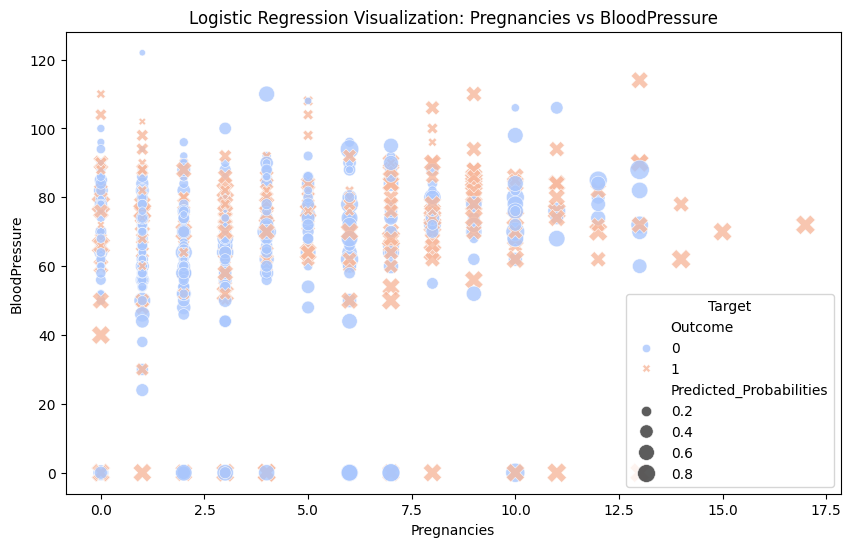

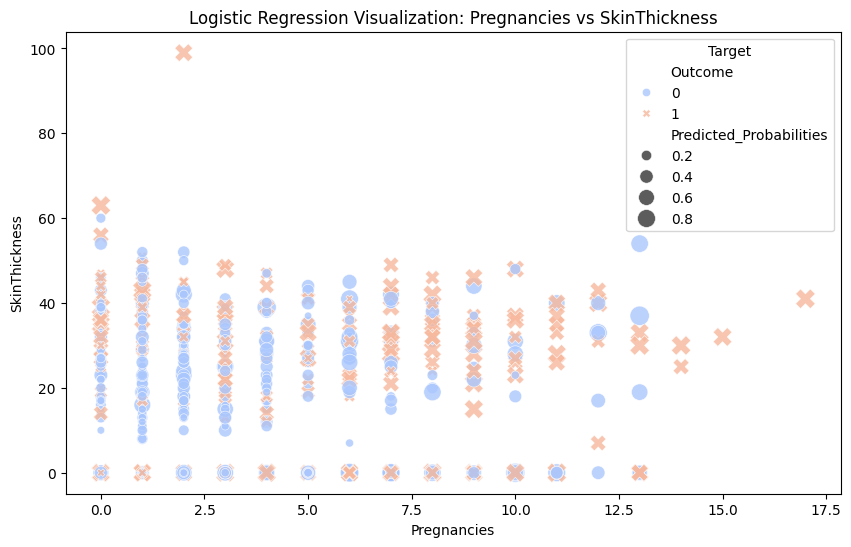

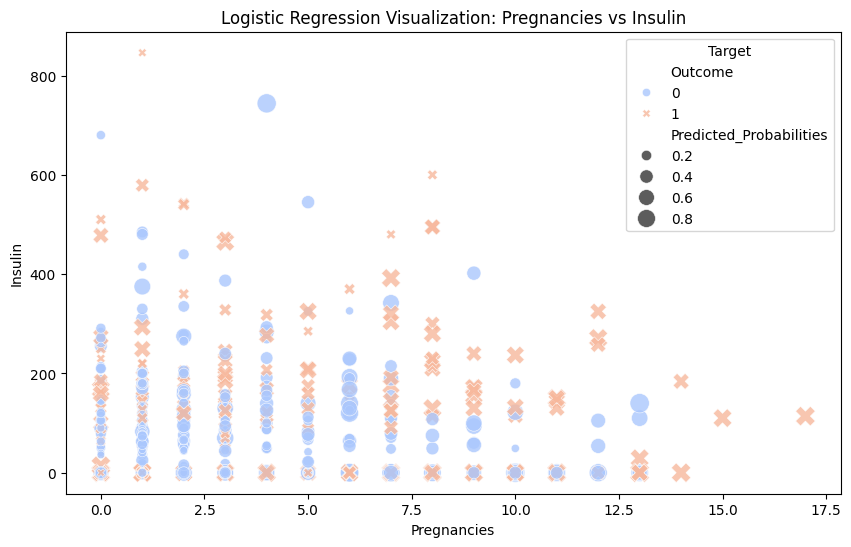

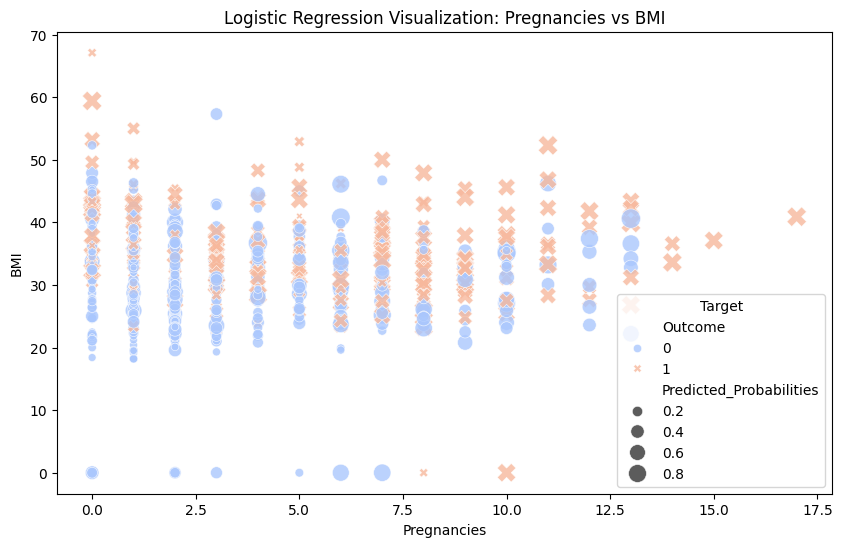

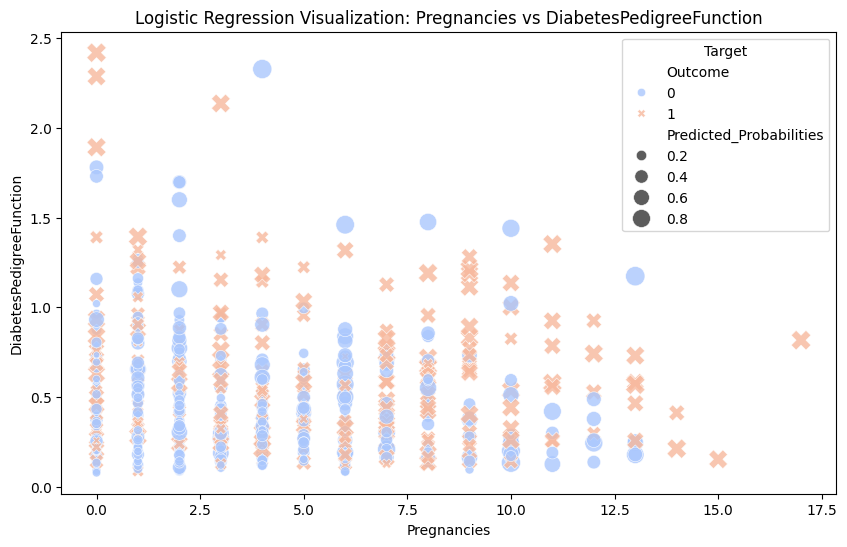

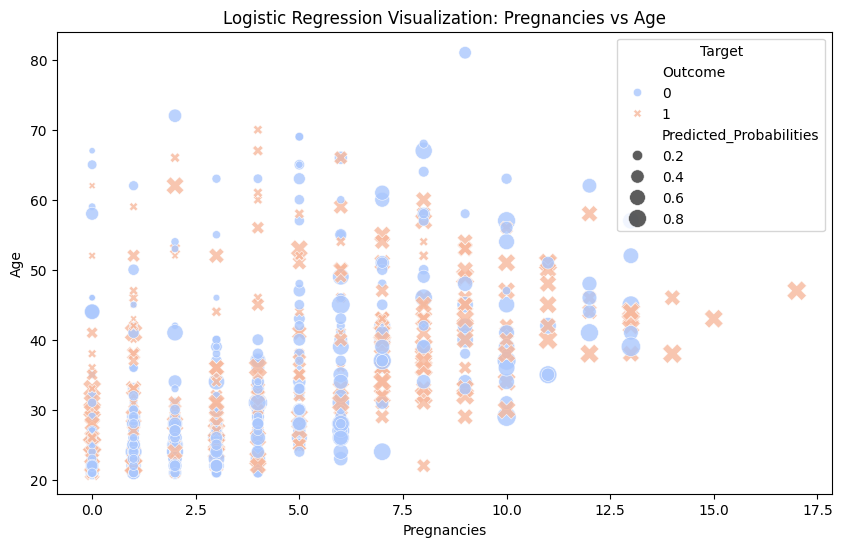

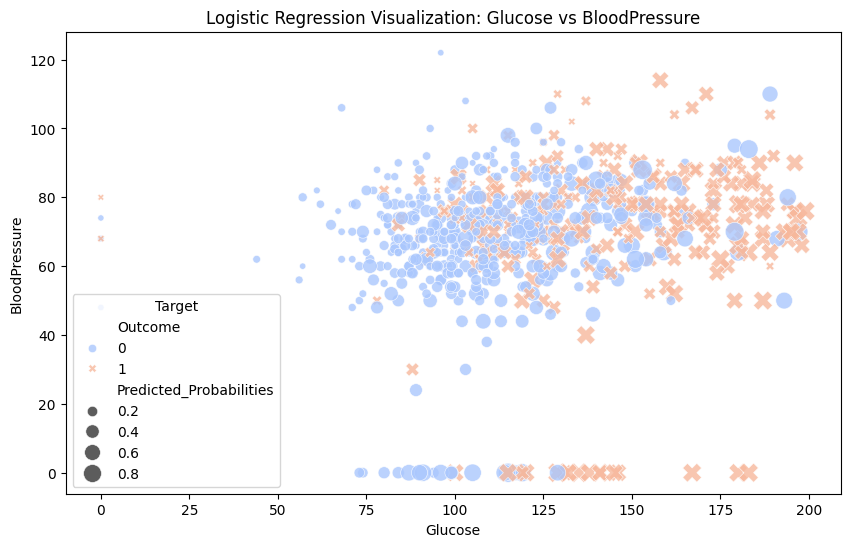

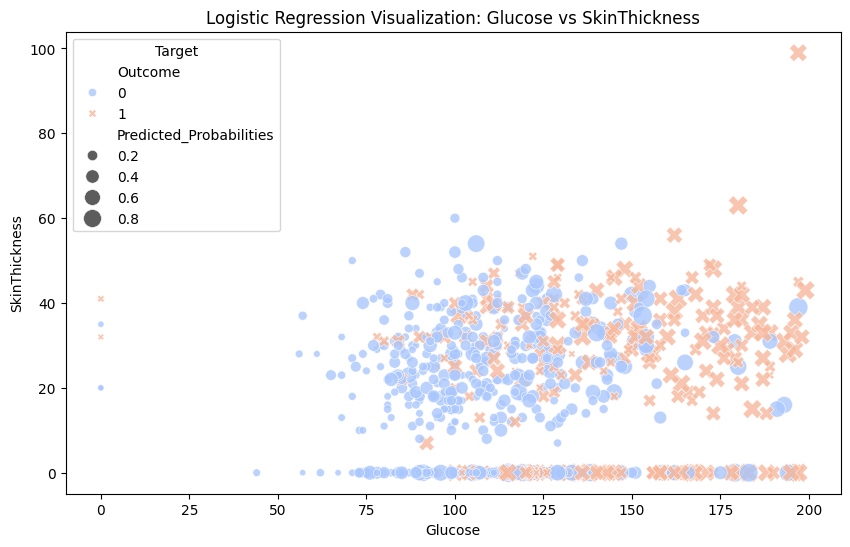

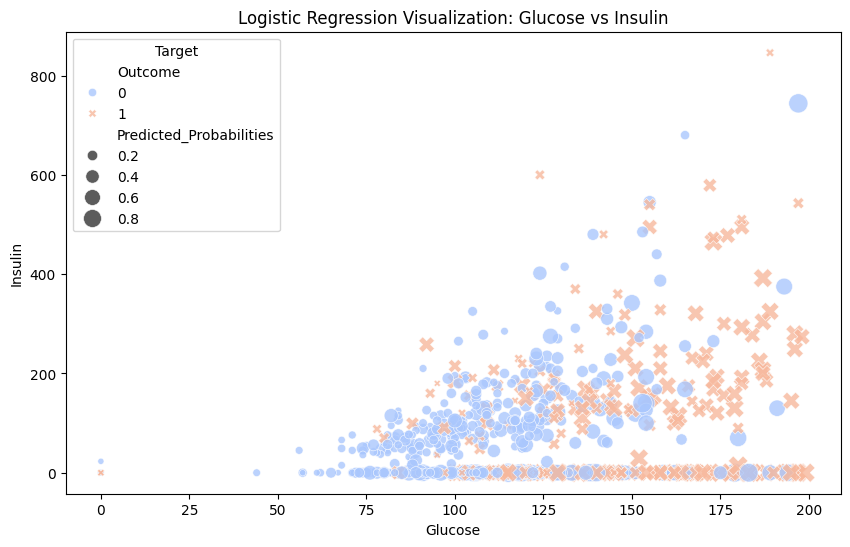

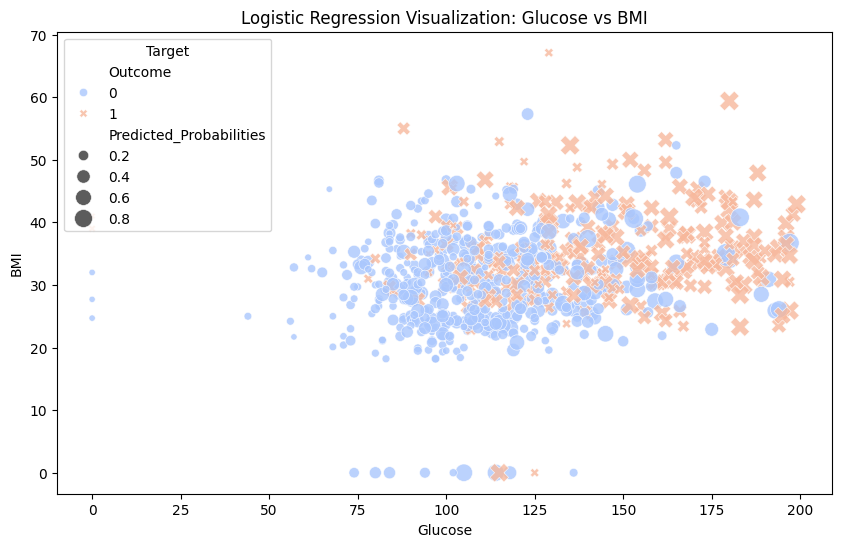

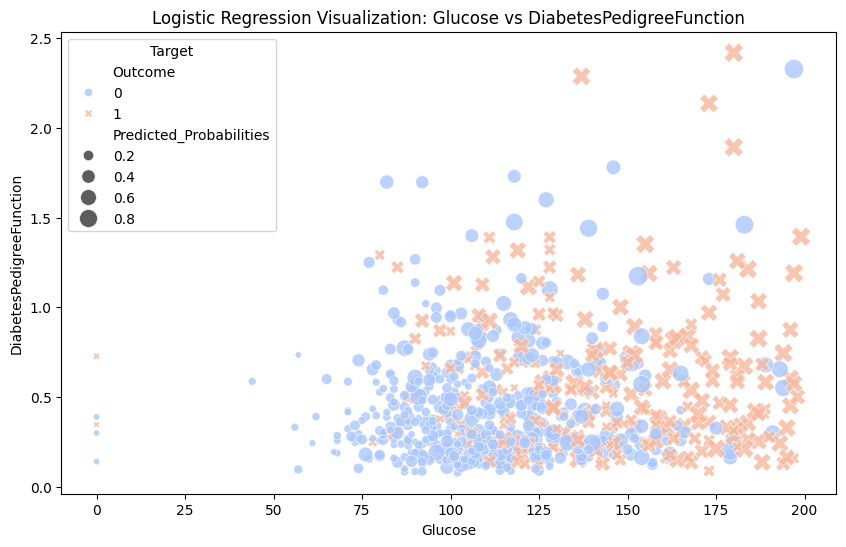

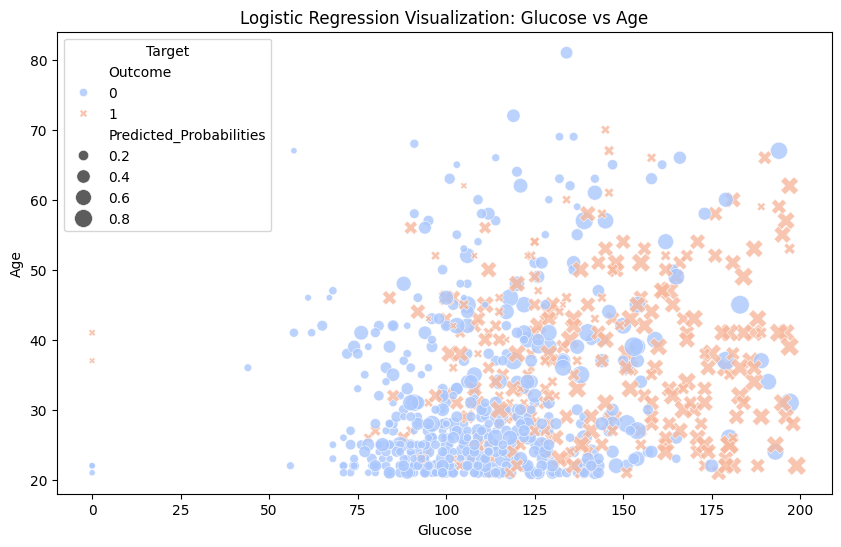

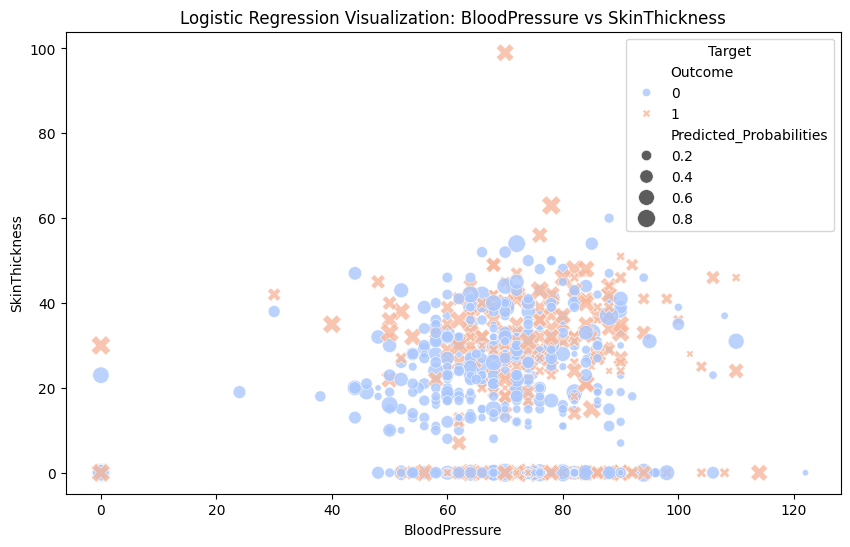

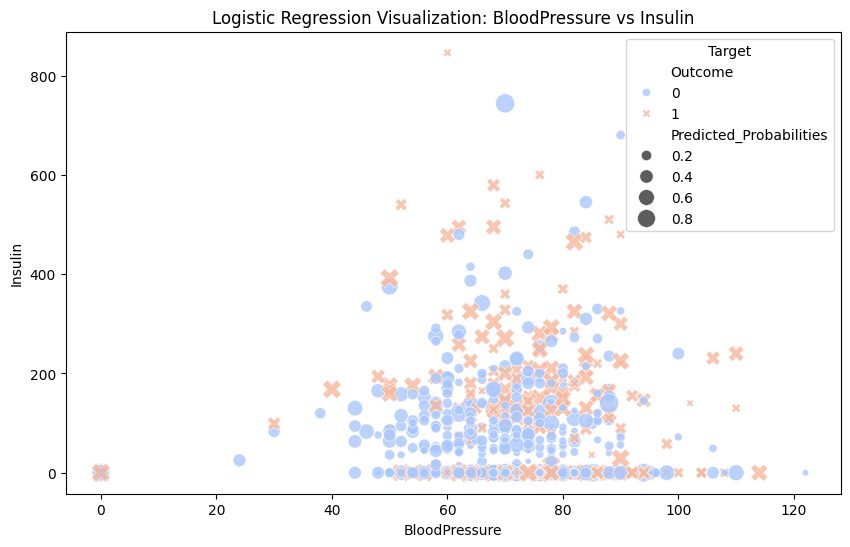

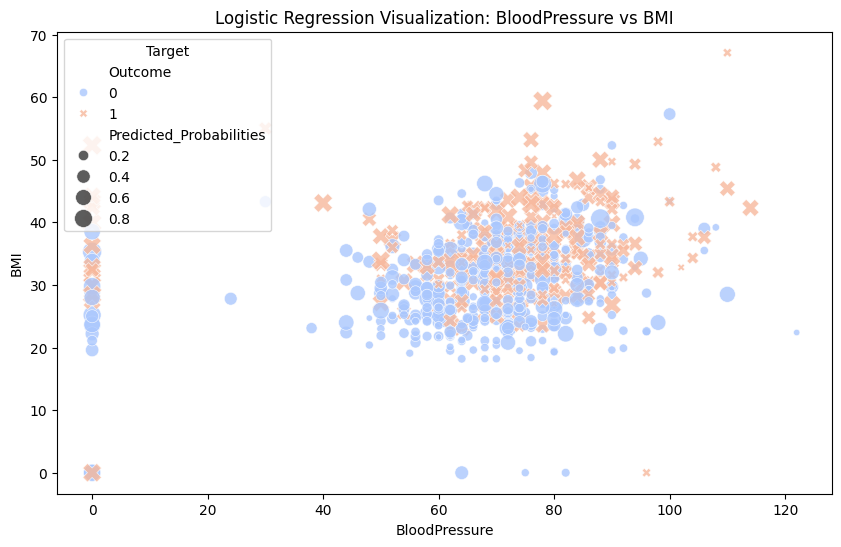

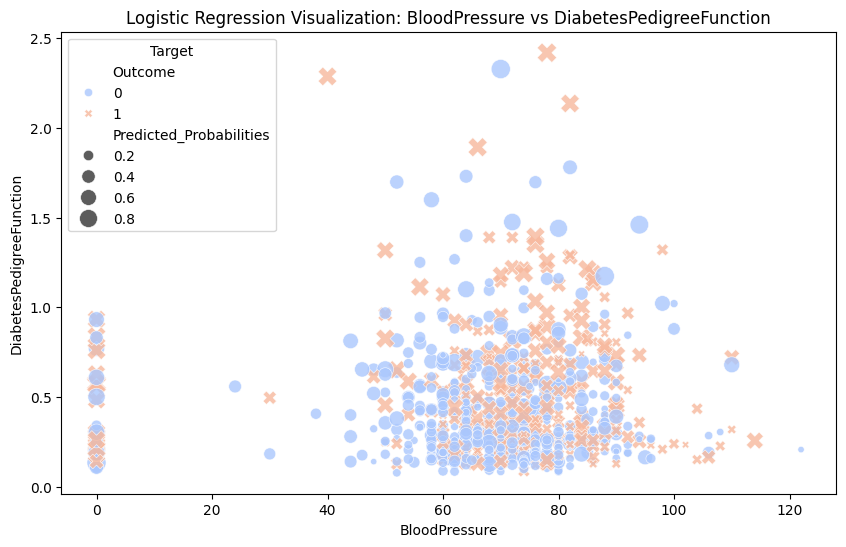

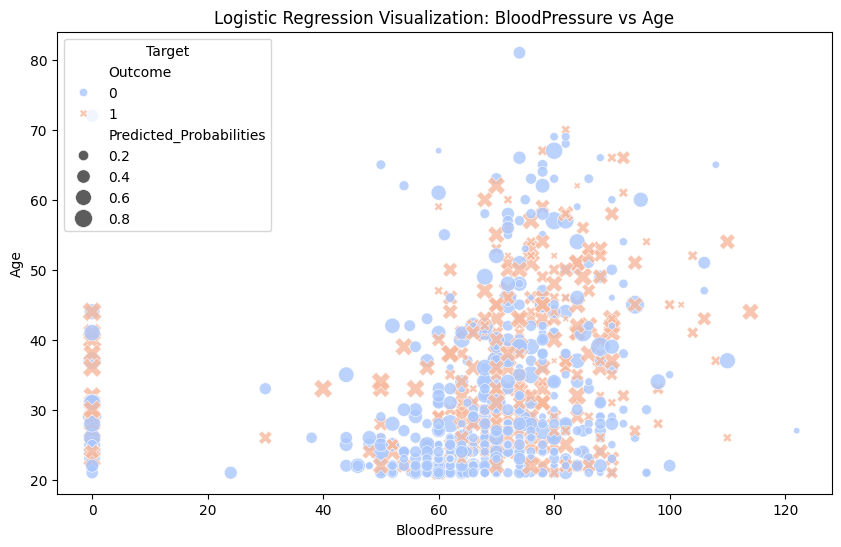

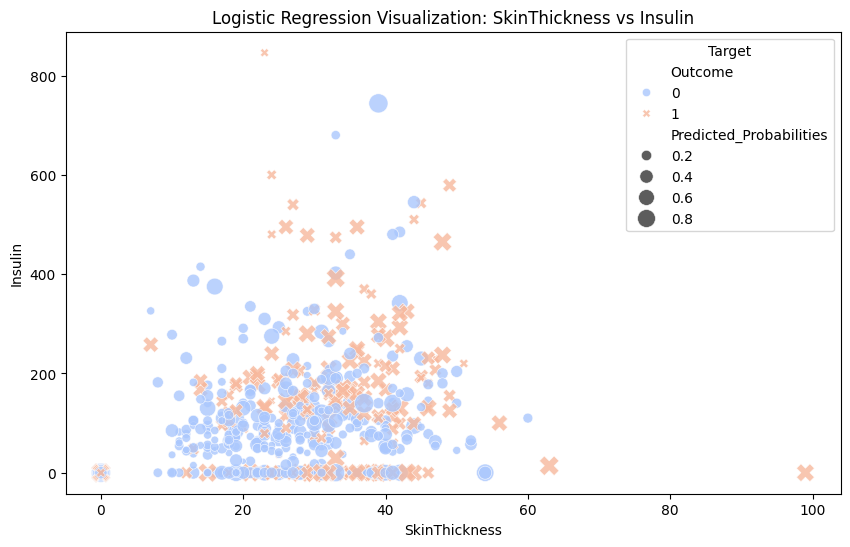

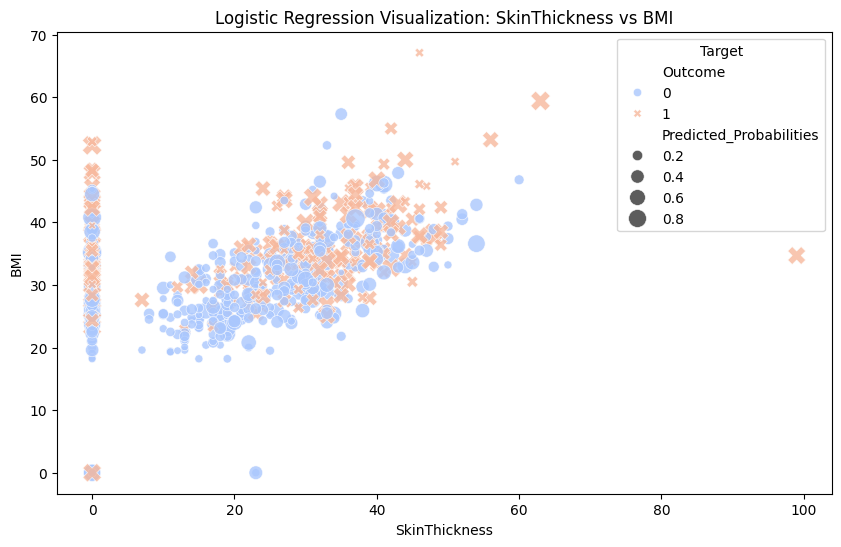

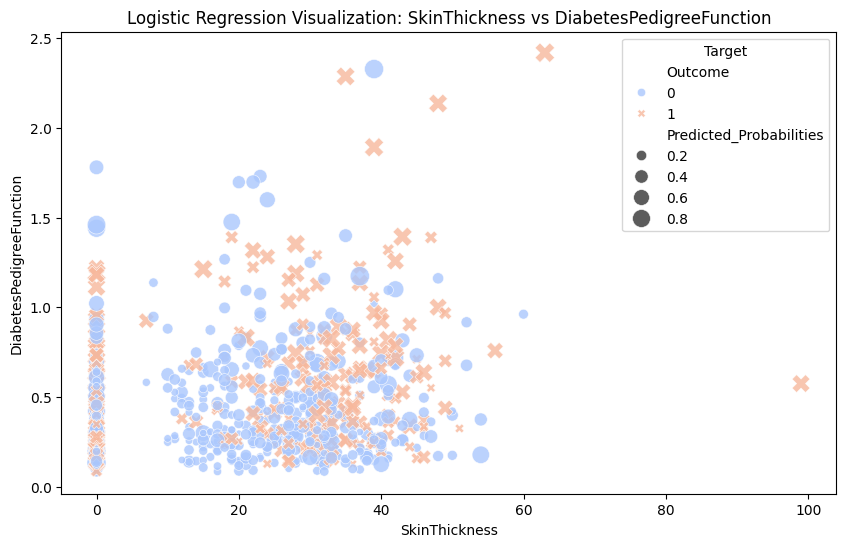

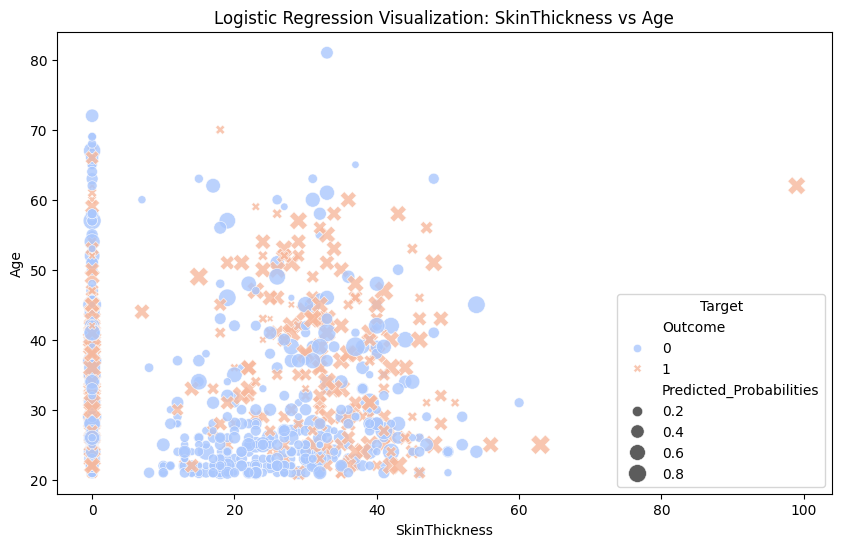

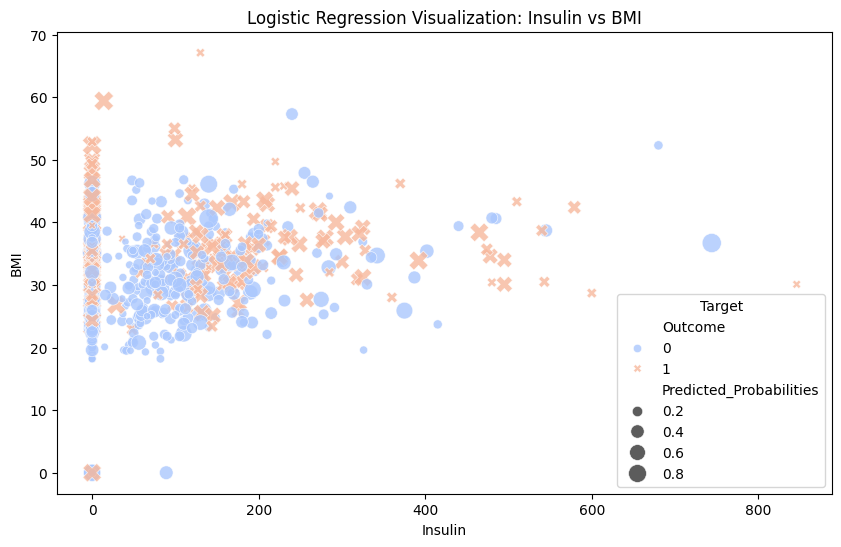

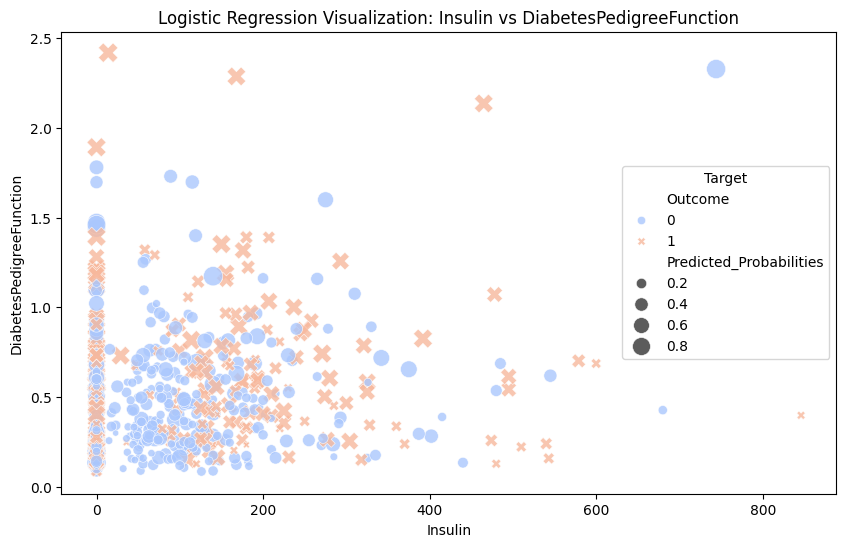

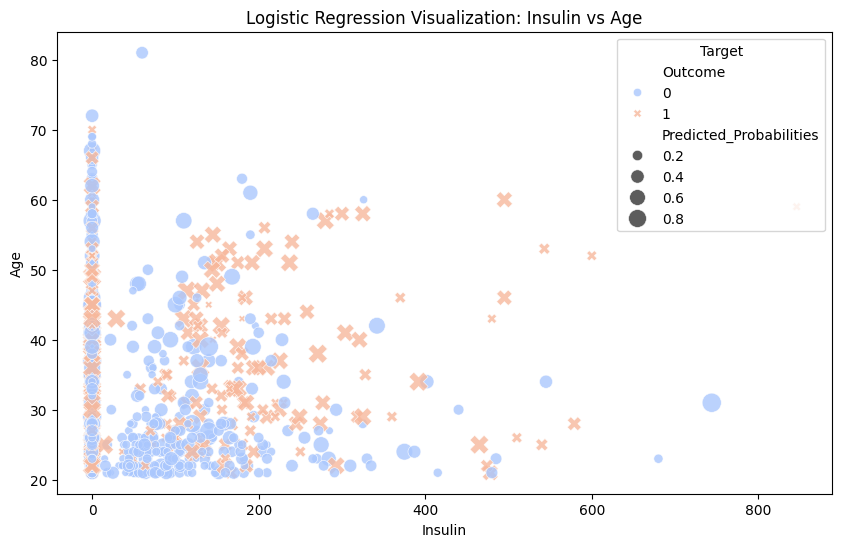

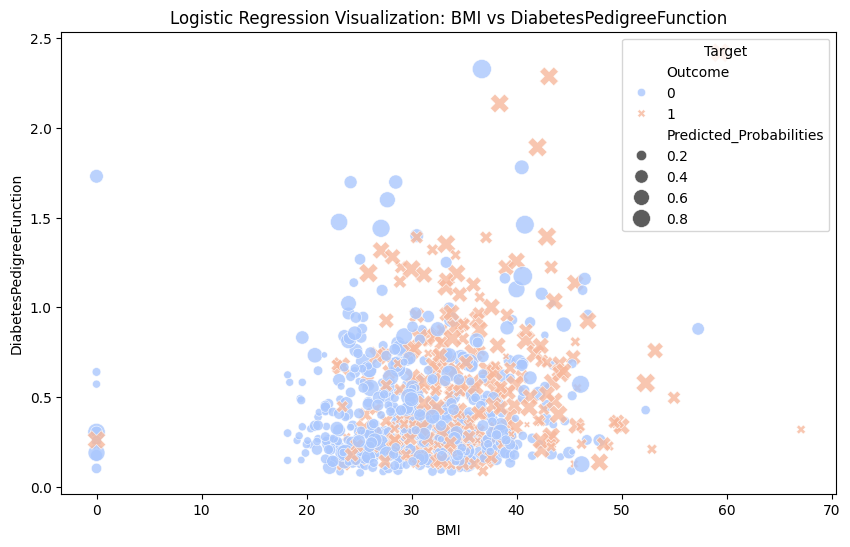

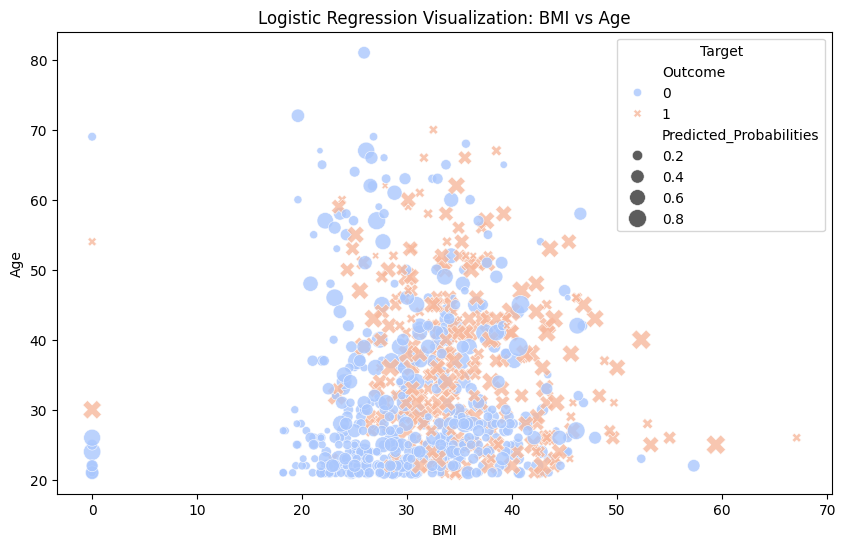

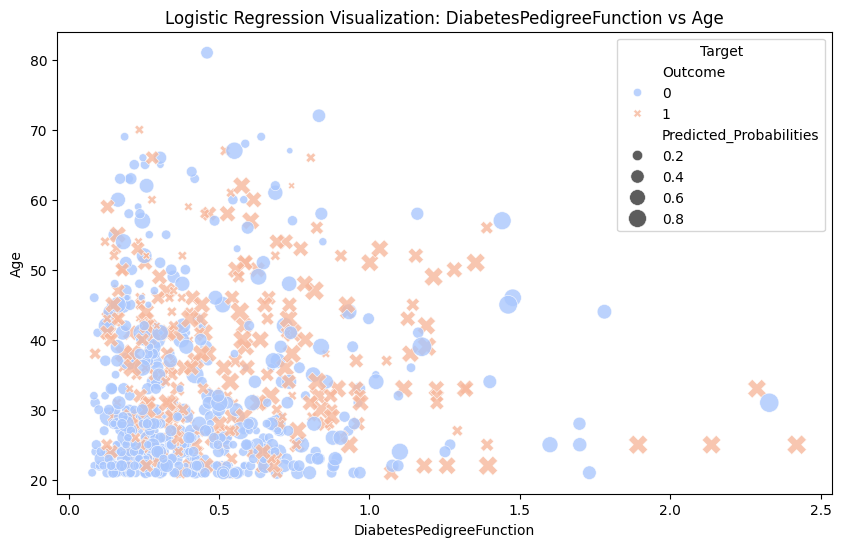

In [15]:
visualize_logistic_regression_all_features(diab, target_column="Outcome", model=test_logistic_regressed["model"], feature_columns=feature_cols)

### Logistic Regression Using Standardization

Do a logistic regression on data that has been standardized before. Are there differences in the model output?